# Random Graphs Using Quantum computing

Graphs are algebraic structures wich are studied in the theory with the same name, these structures are a fundamental part of courses like mathemathics, computing science, systems engineering, etc; additionally, it has applications in statistics physics, pharmaceutical chemistry, criptography but especially in computing science. In this project, we make a study and interpretation with quantum mechanics to a particular class of graphs named random graphs, this interpretation allow us to compute the random graphs through quantum circuits thus allowing the construction of various applications.

## Team Gatos Salvajes, Members:
	-Moreno Triana, Jhon S.
	-Quevedo Farieta, Fabian F.
	-Ramos Salas, Carlos J.
	-Yepes Peñaranda, Alejandro J.
   

# Individual Files in the Git

This notebook is the union of the work done by the group throughout the Hackathon made in the Quantum Fall Fest QColombia 2022, although it is possible to read it without having to review the other files, we recommend reading al the other files in the github. These are done by way of contextualization and are related to this notebook as follows:


1. Theoretical framework and justification, Interpretion with quantum mechanics - ```GrafosCuanticosTeoria.ipynb```.
2. Application #1 - ```GeneradorCliquesAleatorios.ipynb```.
3. Application #2 - ```RandomGraph.py```.
4. Application #3 - ```MetodosDeEncriptacionClasicos.ipynb```, ```circuitoEncriptación.ipnb```.
5. Files with definitions and functions used - ```dataStructures.py```, ```util.py```.

# 1. Theoretical framework and justification

A graphs ($G$) is an ordered pair $(V, \ E)$, where $V$ is a set whose elements are called vertices, and $E \subseteq V^2$ is the set of edges, wich elementes are paired vertices and allow us to represent a binary operation between the two vertices. Some examples of graphs are presented below.


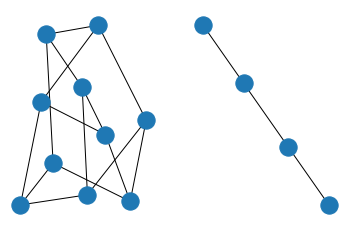

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

Grafo = nx.Graph()
Grafo.add_node("A")      
Grafo.add_node("E")
Grafo.add_node("I")
Grafo.add_edge("A","E")  
Grafo.add_edge("E","I")
Grafo.add_edge("I","U")

g1 = nx.petersen_graph()


fig1 = plt.subplot(1, 2, 1)
nx.draw(g1)

fig2 = plt.subplot(1, 2, 2)
nx.draw(Grafo)

plt.show()

A random graph ($G'$) is a graph that can be generated by a probabilistic or aleatory process. There is no an only way to generate a random graph, one of the ways to create one is to start from a specific base with a fixed quantity of vertices and determine according to a probability if one vertice is connected with another, if all vertices were connected then the resulting graph correspond to the complete graph, we'll call this "cliques" and we'll denote by $K_n$ (if the graph has $n$ vertices), in the same way, the random graph generated with said base will be denoted by $K'_n$.

Depending on how we define the "succes" event with the probability, we can have different bases, for example, we can start having all vertices fixed and no edges, with the "succes" event between two vertices we create an edge between these two, on the other hand, we can start from the complete graph (i.e. al vertices fixed and all the possible edges) and with the "succes event" between two vertices we eliminate the corresponding edge.

Some examples of clique or complete graphs are presented below.

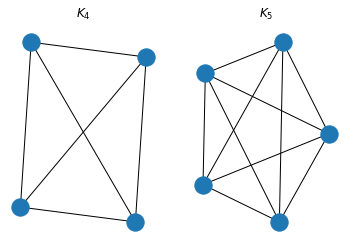

In [13]:
k4=nx.complete_graph(4)
k5=nx.complete_graph(5)



fig1 = plt.subplot(1, 2, 1)
nx.draw(k4)
fig1.set_title('$K_4$')

fig2 = plt.subplot(1, 2, 2)
nx.draw(k5)
fig2.set_title('$K_5$')


plt.show()

Another of the useful bases that was used in this project was the the binary trees bases. We start from a binary tree $T$, in these graphs there will be a vertex that will only have two neighboring vertices, we call this vertex as "root" and we can construct all the trajectories starting in this vertex. In a binary tree, all the vertices will have two "descendent" vertices except the vertices where the trajectory ends. In the code below, we present an example of a binary tree with $3$ generations of offspring

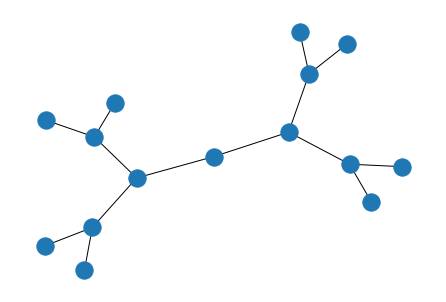

In [14]:
btree = nx.balanced_tree(2, 3)
nx.draw(btree)
plt.show()

In particular, if we work with a binary tree as a base, we can start from the root and with a probabilistic factor we decide if we create the edge to the first or second descendent, then we follow the same process only with the vertex determined in the previous step and we repite it until we reach the last vertex (i.e. the final of the trajectory). In this way, if we start with $n$ generations, it's possible to create $2^n$ possibles trajectories with the same bases.

# 1.1. Interpretion with quantum mechanics

It's well known that the probability of two events complementary could be described through a wave function, for example, when we trow a coin, we can get as a result "heads" or "tails", if $F$ is the wave function of the experiment result, then, this could be written like $|F\rangle=\sqrt{0.5}|C\rangle+\sqrt{0.5}|S\rangle$, where the states corresponds to obtain heads and tails respectively. Taking into account the mentioned, we can define wave functions for the probabilistic character of random graphs, for example, using the clique base, the wave function who determines the existence of an edge between the vertex $i$ and the vertex $j$ could be described through the states "exist" ($Ex$) and "no exist" ($nEx$), then, the wave function would be of the form $|f_{i j}\rangle=\sqrt{p}|Ex\rangle+\sqrt{1-p} \ e^{i \theta}|nEx\rangle$, where $p$ is a probability and $\theta$ the existing phase between the states. It is easy to observe that in this base, tha quantity of wave functions will be equal to $\dfrac{n(n-1)}{2}$ where $n$ is the amount of vertices.

In a similar way, if we consider the binary tree base with $n$ generations, we define the wave function $f_k$  who determines if the random graph build the edge to the first or second descendant (left or right in this case) in the generation $k-1$, we will have then $|f_k\rangle=\sqrt{p'}|I\rangle+\sqrt{1-p'} \ e^{i \theta}|D\rangle$, where $I$ is the corresponding state to connect the vertex with the first descendent and and $D$ the corresponding to have the vertex connected to the second descendent; in this wave function, we can take any probability distribution $p$, but the most common is to use $p'=0.5$. In the case, if we are working with the binary tree bases and in particular, with a binary tree with $n$ generations, we will have a total of $n$ different wave functions.

One adventage of this interpretation is the direct implication of be able to use the quantum circuits to generate random graphs by measuring the correspondign wave function, having then the possible execution of anoy application of the random graphs.

Something important to know is that the wave function determines the "physics" or behaviour of one probabilistic or no deterministic event, nevertheless, one of the quantum mechanics laws is the $\textit{wave function collapse}$, this law explains that a wave function (who initially is in a superposition of several states) reduce to a single state due to interaction with the external world (for example, measuring the state). For example, let us consider again the experiment of throwing a coin, if we throw it we will not know the result until we see the coin and measure the result, let's suppose that the result is heads, if we don't pick up the coin to throw it again, all futures measuring will result in the same first result, in this case, heads; in wave function language, before we throw the coin the wave function of this experiment will be $|F\rangle=\sqrt{0.5}|C\rangle+\sqrt{0.5}|S\rangle$, but, after we measure the result (again, let's suppose is heads), the wave function will collapse to the state $|F\rangle=|C\rangle$.


# 2. Applications

# 2.1. Application #1: Random graphs generator in the clique base.

In this applications we need to create a quantum circuit using the library qiskit, this circuit consist in a qbit passing through a Hadamard gate (an operation that maps the qbit $|0 \rangle$ to $\sqrt{2}^{-1}(|0 \rangle + |1 \rangle)$) and then we measure to determinate the final state of the qubit, this corresponds to measure the state of only one wave function. It's necessary to have a total of $n(n+1)/2$ wave functions, however, instead of reapiting the circuit several times, is more useful in computational terms put the simulation of the circuit in a for cycle with the purpose of made divers preparations and measures of a simple circuit. Below, we present the correspondig codes to the creation and measure of a wave function with probability $1/2$ in each state and the same case but with $7$ wave functions.

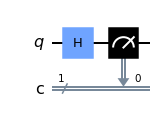

In [15]:
import qiskit
from qiskit import QuantumCircuit

circ = QuantumCircuit(1,1)
circ.h(0)
circ.measure([0],[0])
circ.draw()

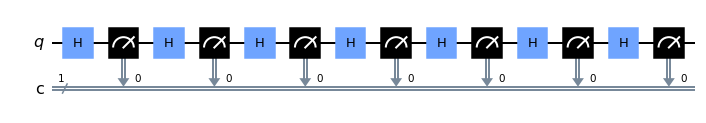

In [16]:
import qiskit
from qiskit import QuantumCircuit

#Funcion de onda numero 1
circ = QuantumCircuit(1,1)
circ.h(0)
circ.measure([0],[0])

#Funcion de onda numero 2
circ.h(0)
circ.measure([0],[0])

#Funcion de onda numero 3
circ.h(0)
circ.measure([0],[0])

#Funcion de onda numero 4
circ.h(0)
circ.measure([0],[0])

#Funcion de onda numero 5
circ.h(0)
circ.measure([0],[0])

#Funcion de onda numero 6
circ.h(0)
circ.measure([0],[0])

#Funcion de onda numero 7
circ.h(0)
circ.measure([0],[0])
circ.draw()

In the following code we define the variable $n$ which corresponds to the number of vertices of the random graph to generate, then, we procede to create the quantum circuite previously described, the $n(n-1)/2$ independent measures correspond to the entries of a simetric matrix $A$ wich is the adjacency matrix of the graph. Finally we can plot the graph with $A$.

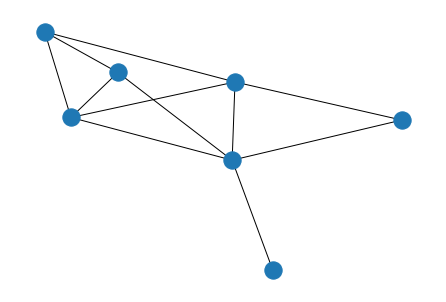

In [17]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import qiskit
from qiskit import QuantumCircuit

# Inserte acá el número de vértices del grafo a trabajar
n = 7

circ = QuantumCircuit(1,1)
circ.h(0)
circ.measure([0],[0])
# circ.draw('mpl')
SimBackend = qiskit.Aer.get_backend('qasm_simulator')

A = np.zeros((n,n))

for i in range(n):
    for j in range(i+1, n):
        Circuito = qiskit.execute(circ,backend=SimBackend,shots=1)
        A[i][j]= max(Circuito.result().get_counts(),key=Circuito.result().get_counts().get)
        A[j][i]=A[i][j]

        
G = nx.from_numpy_matrix(A)
nx.draw(G)
plt.show()

# 2.2. Application #2: Random walks generator with a fixed initial and final point

In this application, we work with the same quantum circuit decribed in the previous application, we define two binary trees, both with $n$ generations, whose last generations are connected via an aleatory factor, making each vertex of the first tree's last generation being connected to two vertices of the second tree's last generation (similar to the figure 2 in the article of Feng Xia), the root of the first tree correspond to the starting point while the root of the second tree correspond to the ending point, using the quantum circuit we determinate the measured values in the wave function allowing to create a random walk that is is representated with the red line.

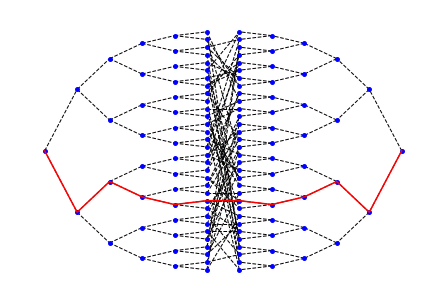

In [18]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import pandas as pd
import random
from qiskit import QuantumCircuit
import qiskit

np.random.seed(823)

n = 5

G1 = nx.balanced_tree(2,n)
G2 = nx.balanced_tree(2,n)
G3 = nx.union(G1,G2,rename=('1-','2-'))

HaveConnection = pd.Series({i:0 for i in range(2**(n)-1,2**(n+1)-1)})

def GenEdges(HaveConnection):
    return random.sample(list(HaveConnection.where(HaveConnection<2).dropna().index),2)

for i in range(2**n-1,2**(n+1)-1):
    newEdges = GenEdges(HaveConnection)
    for j in newEdges:
        G3.add_edge(f'1-{i}',f'2-{j}')
        HaveConnection[j] += 1

pos = {}
pos[f'1-0'] = (0,0.5)
pos[f'2-0'] = (1,0.5)
k = 0.5
for i in range(1,n+1):
    #print(i        /(2*n+1))
    delta = k/2
    for j in range(2**i,2**(i+1)):        
        #print(i        /(2*n+1),0.5)


        pos[f'1-{j-1}'] = (i        /(2*n+1),delta+2*delta*(j-2**i))
        pos[f'2-{j-1}'] = ((2*n-i+1)/(2*n+1),delta+2*delta*(j-2**i))
    k = delta
xs = np.linspace(0,1,12)


nx.draw(G3,pos,node_size=15,style='--',node_color='b')

circ = QuantumCircuit(1,1)
circ.h(0)
circ.measure([0],[0])
SimBackend = qiskit.Aer.get_backend('qasm_simulator')

camino = ''
ys = [0.5]
k = 0.5
for i in range(n+1):
    delta = k/2
    Circuito = qiskit.execute(circ,backend=SimBackend,shots=1)
    camino += max(Circuito.result().get_counts(),key=Circuito.result().get_counts().get)
    if i < n:
        dy = delta
        if camino[-1] == '0':dy*=-1
        ys.append(ys[-1]+dy)
    else:
        for nodename in pos:
            if nodename.startswith('1-'):
                position = pos[nodename]
                #print(type(position))
                if round(position[0],6) == round(xs[len(ys)-1],6) and round(position[1],6) == round(ys[-1],6):
                    break
        connectingnodes = pd.Series(list(G3[nodename].keys()))
        if camino[-1] == '0': 
            first2 = '2-{}'.format(min(connectingnodes.where(connectingnodes.str.startswith('2-')).dropna().str[2:].astype('int')))
        else:
            first2 = '2-{}'.format(max(connectingnodes.where(connectingnodes.str.startswith('2-')).dropna().str[2:].astype('int')))

        ys.append(pos[first2][1])
        for i in range(5):
            connectingnodes = pd.Series(list(G3[first2].keys()))
            #print(connectingnodes.where(connectingnodes.str.startswith('2-')).dropna().str[2:].astype('int'))
            first2 = '2-{}'.format(min(connectingnodes.where(connectingnodes.str.startswith('2-')).dropna().str[2:].astype('int')))

            ys.append(pos[first2][1])
    k = delta
plt.plot(xs[:len(ys)],ys,'r-')
#print(camino)
plt.savefig('CaminoAleatorioEnGrafo.pdf',bbox_inches='tight')
plt.show()

# 2.3. Application #3: Quantum encrypter ROT N

For the application of the ecryptation method, we use a very simple quantum circuit. The algorithm proceed as it follows

1. Encode the text string you enter into a binary code, in this case each letter was assigned a numerical value.
2. Set up a quantum circuit for each binary number.
3. Measure the resulting states of the circuit and note the distance between the values assigned to the string entered and the values obtained.

Through this algorithm, it is enough to know the route or "path" to be able to decrypt the message. This can be extended to other types of encryption that change the bases of the receiver or the sender of the message. The implementation of the algorithm and the results are shown below.

In [ ]:
import util as ut
import numpy as np
import qiskit
import pandas as pd
%matplotlib inline
words = ["hola","qiskit","quantum"]
binaryArray = [ut.stringToBinary(i) for i in words]
circuits = [[ut.prepareCircuit(j) for j in i] for i in binaryArray]

In [ ]:
simulator = qiskit.Aer.get_backend("qasm_simulator")
binaryResults=[[list(qiskit.execute(circuits[i][j], backend = simulator, shots =1).result().get_counts())[0] for j in range(len(circuits[i]))] for i in range(len(circuits))]
path = [[abs(ut.binToInt(binaryArray[i][j])-ut.binToInt(binaryResults[i][j]))%26 for j in range(len(binaryArray[i]))]for i in range(len(binaryResults))]
wordResults = ["".join([ut.ROT(ut.binToInt(binaryArray[i][j])%26,words[i][j]) for j in range(len(binaryArray[i]))]) for i in range(len(words))]
binaryWords = [" ".join(binaryResults[i]) for i in range(len(binaryResults))]

In [ ]:
data = {"Palabra original" : words,
       "Encriptación en binario" : binaryWords,
       "Encriptación ROT" : wordResults,
       "Recorrido" : path}
pd.DataFrame(data)

Noting that the encryption method works and to return the path, it is done in the same way as in the classical form of the ROT, algorithm shown in ```MetodosDeEncriptacionClasicos.ipynb```.

A different result is added to the ROT and it is the binary representation given by the quantum states, this is interesting because the algorithm can be extended for special characters using the ASCII system.

# URL of the project

https://github.com/Jh0mpis/GrafosAleatoriosUsandoComputacionCuantica.

## References:
- Xia, Feng & Liu, Jiaying & Nie, Hansong & Fu, Yonghao & Wan, Liangtian & Kong, Xiangjie. (2019). Random Walks: A Review of Algorithms and Applications. IEEE Transactions on Emerging Topics in Computational Intelligence. PP. 1-13. 10.1109/TETCI.2019.2952908. https://arxiv.org/pdf/2008.03639.pdf.
- Hayashi, M., & Morimae, T. (2015). Verifiable measurement-only blind quantum computing with stabilizer testing. Physical review letters, 115(22), 220502. https://arxiv.org/abs/1505.07535